# Survival Analysis

### What is Survival Analysis?

- Traditionally used in the medical & actuarial field, survival analysis is becoming more common to use for HR practices


- It helps us measure the durations between the birth event (hire date), and death event (termination date)


- Formula: S(t) == P( T > t)
    - The formula is basically saying, “What is the probability that the individual stays in the company longer than t”
    - T = is the lifetime of a member of the population (Random)
    - t = time
    - S(t) = is the survival curve at time t


- Let's look at how we can use survival analysis with HR employee data.


### Follow along below for a walkthrough on creating a basic Kaplan-Meier survival curve lifelines

In [41]:
### importing libraries ###



#pip install lifelines
#pip install tabulate

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# lifelines
from lifelines import NelsonAalenFitter, CoxPHFitter, KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines.utils import median_survival_times

In [42]:
### Lets load in the data ###
### Fake dataset sourced from kaggle - https://www.kaggle.com/rhuebner/human-resources-data-set?select=HRDataset_v13.csv ###


df = pd.read_csv('https://raw.githubusercontent.com/amcgrory/Survival-Analysis-HR-Data-Example/main/EmployeeData.csv')

In [43]:
df.head()

,Employee_Name,EmpID,event_observed,PositionID,Position,State,Zip,DOB,AgeGroup,Sex,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Riordan, Michael",1502072711,0,3,Area Sales Manager,ND,58782,1/15/1968,Over 40,M,...,Sales,Lynn Daneault,21.0,Billboard,Exceeds,4.10,3,0,1/4/2019,0.0
1,"Thibaud, Kenneth",1011022777,1,20,Production Technician II,MA,2472,9/16/1975,Over 40,M,...,Production,Webster Butler,39.0,Pay Per Click - Google,Fully Meets,1.37,4,0,NaN,NaN
2,"Pitt, Brad",1001735072,0,19,Production Technician I,MA,2451,11/23/1981,Under 40,M,...,Production,David Stanley,14.0,Search Engine - Google Bing Yahoo,Fully Meets,3.66,3,0,2/25/2019,0.0
3,"Alagbe,Trina",1011022883,0,19,Production Technician I,MA,1886,9/27/1988,Under 40,F,...,Production,Elijiah Gray,16.0,Billboard,Fully Meets,4.84,5,0,1/3/2019,0.0
4,"Ybarra, Catherine",1001268402,1,19,Production Technician I,MA,2458,5/4/1982,Under 40,F,...,Production,Brannon Miller,12.0,Search Engine - Google Bing Yahoo,PIP,4.29,2,0,NaN,NaN


In [44]:
### Looking at data columns ###

print(df.columns.values)

['Employee_Name' 'EmpID' 'event_observed' 'PositionID' 'Position' 'State'
 'Zip' 'DOB' 'AgeGroup' 'Sex' 'MaritalDesc' 'CitizenDesc' 'HispanicLatino'
 'RaceDesc' 'DateofHire' 'DateofTermination' 'DaysWorkingTerm'
 'DaysWorkingActive' 'DaysWorking' 'TermReason' 'EmploymentStatus'
 'Department' 'ManagerName' 'ManagerID' 'RecruitmentSource'
 'PerformanceScore' 'EngagementSurvey' 'EmpSatisfaction'
 'SpecialProjectsCount' 'LastPerformanceReview_Date' 'DaysLateLast30']


In [45]:
kmf = KaplanMeierFitter()

In [46]:
### T is the durations. DaysWorking = how many days has the employee been in the role ###
 
T = df['DaysWorking']

In [47]:
### C = Censorship = 1 is they termed, 0 is they haven't in this timeframe and are censored ###
### Censorship needs to happen because we don't always see the death event - most of the time current time censor us from seeing it ###

C = df['event_observed']

In [48]:
### creating out model - as you can see, 207 cases were censored ###

kmf.fit(T,event_observed=C)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 310 total observations, 207 right-censored observations>

Populating the interactive namespace from numpy and matplotlib


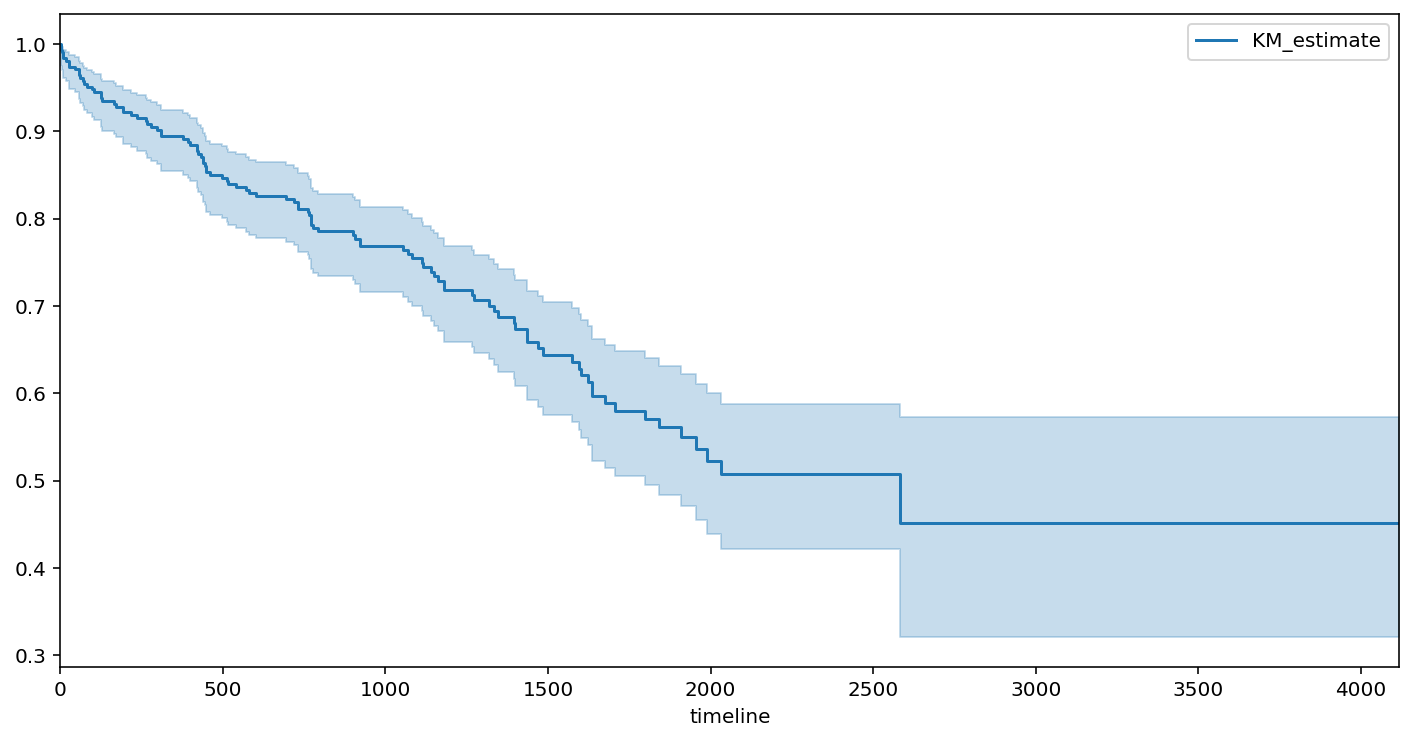

In [49]:
### Survival Analysis curve on general dataset ###
### Ignore the pink box below when you run this cell - It's not an error to worry about ###

### The survival curve below is called a Kaplin Meier estimator - used to estimate the survival statistic ###
### Due to sample size restriction, I will not be running statistics in this example ###


%pylab inline
figsize(12,6)
kmf.plot()

Populating the interactive namespace from numpy and matplotlib


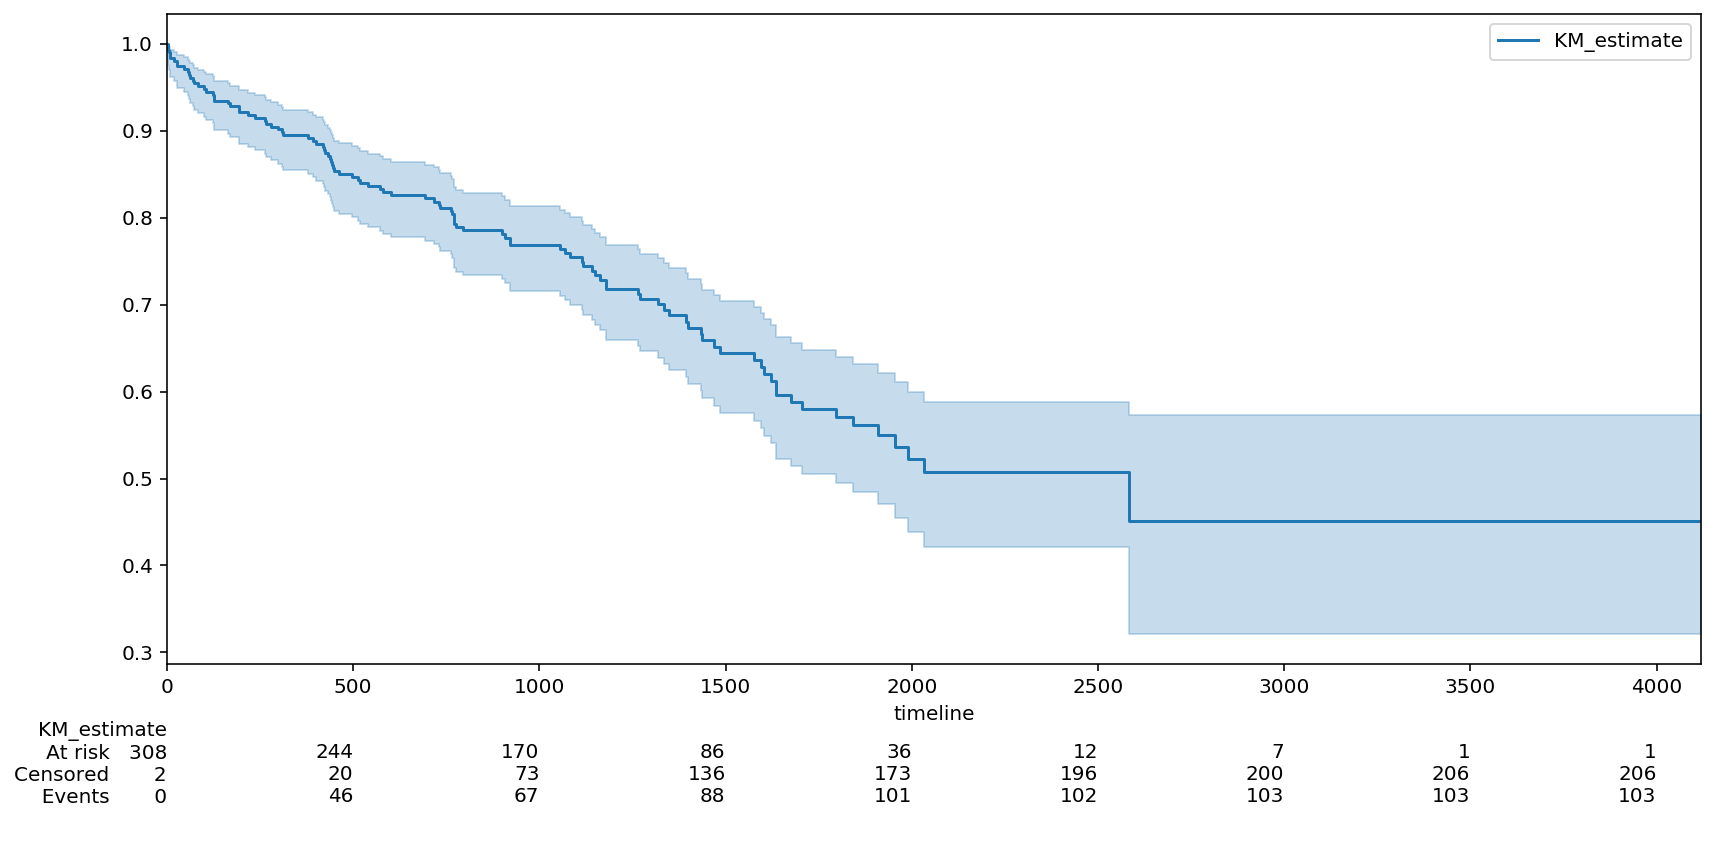

In [50]:
# If you want to clean up the chart to be easily presentable, you can use the code below #

%pylab inline
figsize(12,6)
kmf.plot(at_risk_counts=True)
plt.tight_layout()

In [51]:
### How to better see points of % Survival ###
### Big insight I see: "In the first 90 days of employment, we are seeing only 5% terminate ###
### If the company wants that lower, they should look at onboarding techniques & exit interviews to learn more about this population ###

pd.set_option('display.max_rows', None)
print(kmf.survival_function_)

          KM_estimate
timeline             
0.0          1.000000
2.0          0.993506
6.0          0.990260
8.0          0.983766
19.0         0.980519
26.0         0.977273
27.0         0.974026
45.0         0.970779
57.0         0.967532
58.0         0.964286
62.0         0.961039
64.0         0.961039
69.0         0.957770
72.0         0.954490
83.0         0.951210
98.0         0.947930
103.0        0.947930
105.0        0.944639
124.0        0.941347
125.0        0.938056
127.0        0.934764
164.0        0.931473
170.0        0.928181
194.0        0.921599
200.0        0.921599
218.0        0.918284
226.0        0.918284
236.0        0.914956
264.0        0.911629
267.0        0.908302
273.0        0.908302
280.0        0.904963
288.0        0.904963
290.0        0.904963
294.0        0.904963
299.0        0.901548
309.0        0.898133
311.0        0.894718
318.0        0.894718
344.0        0.894718
378.0        0.891277
392.0        0.887836
399.0        0.884394
419.0     

In [52]:
### The sample gets smaller when you get to ~4000 days in role ###
### you can see from the graph & table below, the higher number of days the wider the confidence intervals grow apart ###

print(kmf.confidence_interval_)

        KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.0                   1.000000                1.000000
2.0                   0.974288                0.998372
6.0                   0.970107                0.996848
8.0                   0.961441                0.993211
19.0                  0.957155                0.991201
26.0                  0.952921                0.989100
27.0                  0.948735                0.986925
45.0                  0.944596                0.984688
57.0                  0.940498                0.982398
58.0                  0.936439                0.980062
62.0                  0.932413                0.977685
64.0                  0.932413                0.977685
69.0                  0.928382                0.975259
72.0                  0.924363                0.972793
83.0                  0.920372                0.970297
98.0                  0.916407                0.967773
103.0                 0.916407                0.967773
105.0     

In [53]:
median_survival_times(kmf.survival_function_)

2583.0

# Other Examples

C:\Users\amcgrory\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


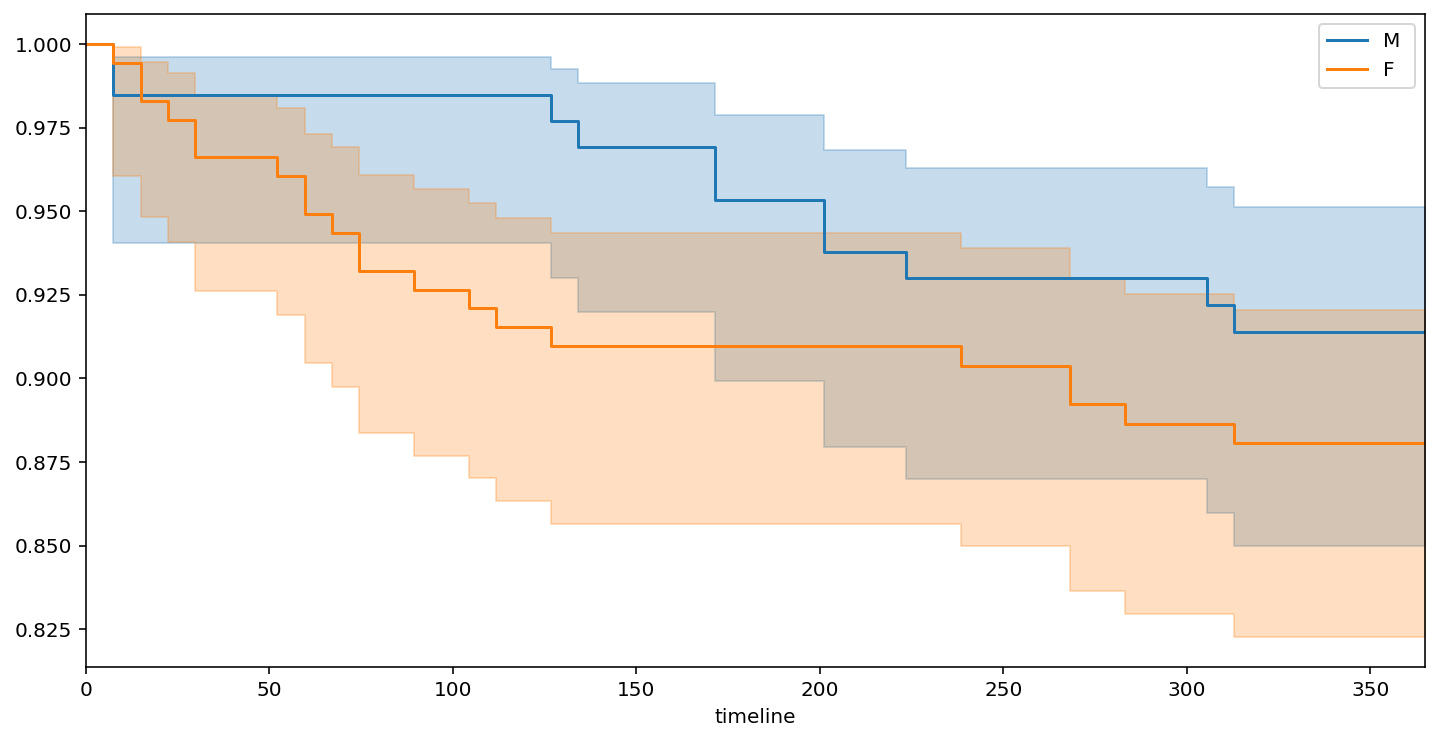

In [54]:
### What if we look at survival analysis by Gender - is one gender terming at a higher rate than others? ###
### NOTE: Sample is too small to make decisions/run stats on to get meaningful insight ###
### Confidence intervals are well dispersed. This is because our sample is so small ###


t = np.linspace(0,365)
ax = subplot(111)
figsize(12,6)

for s in df['Sex'].unique():
    ix = df['Sex'] == s
    kmf.fit(T.ix[ix], C.ix[ix],timeline=t, label=s)
    ax = kmf.plot(ax=ax)

C:\Users\amcgrory\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


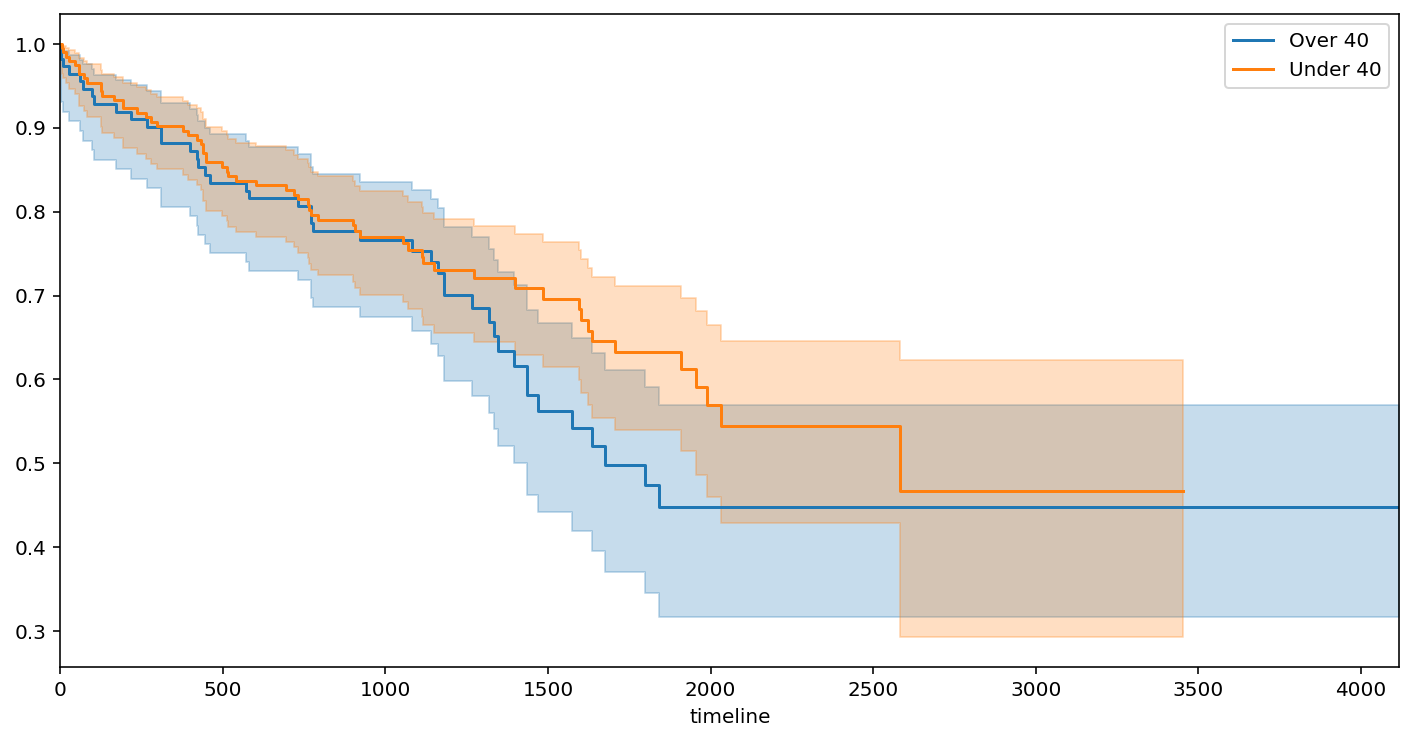

In [55]:
# What if we look at survival analysis by Age Group - is one age group terming at a higher rate than others? #
# NOTE: Sample is too small to make decisions/run stats on to get meaningful insight #


ax = subplot(111)
figsize(12,6)

for g in df['AgeGroup'].unique():
    ix = df['AgeGroup'] == g
    kmf.fit(T.ix[ix], C.ix[ix], label=g)
    ax = kmf.plot(ax=ax)

# Matrix Analysis Example



##### Here' another interesting way to look at turnover trends. I'll load in another excel file with cases who have only "Termed"

In [56]:
### This dataset is only those cases that have termed ###

df_terms = df = pd.read_csv('https://raw.githubusercontent.com/amcgrory/Survival-Analysis-HR-Data-Example/main/Turnover_Terms_Only.csv')

In [57]:
df_terms.head()

,Employee_Name,EmpID,event_observed,PositionID,Position,State,Zip,DOB,AgeGroup,Sex,...,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
0,"MacLennan, Samuel",1201031032,1,19,Production Technician I,MA,1938,11/9/1972,Over 40,M,...,hours,Voluntarily Terminated,Production,Amy Dunn,11,Pay Per Click,Fully Meets,3.08,4,0
1,"Baczenski, Rachael",1307060083,1,19,Production Technician I,MA,1902,1/12/1974,Over 40,F,...,Another position,Voluntarily Terminated,Production,David Stanley,14,Diversity Job Fair,Fully Meets,1.79,4,0
2,"Hernandez, Daniff",1410071156,1,8,Database Administrator,MA,1960,8/7/1986,Under 40,M,...,"no-call, no-show",Terminated for Cause,IT/IS,Simon Roup,4,Employee Referral,Fully Meets,4.33,3,7
3,"Evensen, April",1107027392,1,19,Production Technician I,MA,2458,5/6/1989,Under 40,F,...,"no-call, no-show",Terminated for Cause,Production,Elijiah Gray,16,Word of Mouth,Needs Improvement,1.04,3,0
4,"Gerke, Melisa",1308060622,1,19,Production Technician I,MA,2330,5/15/1970,Over 40,F,...,hours,Voluntarily Terminated,Production,Elijiah Gray,16,Diversity Job Fair,Fully Meets,4.24,4,0


In [58]:
print(df_terms.columns.values)

['Employee_Name' 'EmpID' 'event_observed' 'PositionID' 'Position' 'State'
 'Zip' 'DOB' 'AgeGroup' 'Sex' 'MaritalDesc' 'CitizenDesc' 'HispanicLatino'
 'RaceDesc' 'DateofHire' 'DateofTermination' 'DaysWorkingTerm'
 'TermReason' 'EmploymentStatus' 'Department' 'ManagerName' 'ManagerID'
 'RecruitmentSource' 'PerformanceScore' 'EngagementSurvey'
 'EmpSatisfaction' 'SpecialProjectsCount']


In [59]:
### Create a new variable for Date or Termination, and turn it into a timestamp ###


df_terms['RecodeDateofTermination'] = df_terms['DateofTermination']

In [60]:
print(df_terms.columns.values)

['Employee_Name' 'EmpID' 'event_observed' 'PositionID' 'Position' 'State'
 'Zip' 'DOB' 'AgeGroup' 'Sex' 'MaritalDesc' 'CitizenDesc' 'HispanicLatino'
 'RaceDesc' 'DateofHire' 'DateofTermination' 'DaysWorkingTerm'
 'TermReason' 'EmploymentStatus' 'Department' 'ManagerName' 'ManagerID'
 'RecruitmentSource' 'PerformanceScore' 'EngagementSurvey'
 'EmpSatisfaction' 'SpecialProjectsCount' 'RecodeDateofTermination']


In [61]:
df_terms['RecodeDateofTermination'].tail()

98      4/1/2016
99     5/17/2016
100     4/8/2015
101    5/18/2016
102    9/29/2015
Name: RecodeDateofTermination, dtype: object

In [62]:
df_terms['RecodeDateofTermination'] = pd.to_datetime(df_terms['RecodeDateofTermination'])

In [63]:
type(df_terms['RecodeDateofTermination'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [64]:
time = df_terms['RecodeDateofTermination'].iloc[0]


In [65]:
time

Timestamp('2012-09-26 00:00:00')

In [66]:
time.week

39

In [67]:
### Create new variables that show the week, month, and year someone has termed ###

df_terms['week'] = df_terms['RecodeDateofTermination'].apply(lambda time: time.week)
df_terms['month'] = df_terms['RecodeDateofTermination'].apply(lambda time: time.month)
df_terms['year'] = df_terms['RecodeDateofTermination'].apply(lambda time: time.year)

In [68]:
### Scroll to the far right to see new fields ###

df_terms.head()

,Employee_Name,EmpID,event_observed,PositionID,Position,State,Zip,DOB,AgeGroup,Sex,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,RecodeDateofTermination,week,month,year
0,"MacLennan, Samuel",1201031032,1,19,Production Technician I,MA,1938,11/9/1972,Over 40,M,...,11,Pay Per Click,Fully Meets,3.08,4,0,2012-09-26,39,9,2012
1,"Baczenski, Rachael",1307060083,1,19,Production Technician I,MA,1902,1/12/1974,Over 40,F,...,14,Diversity Job Fair,Fully Meets,1.79,4,0,2011-01-12,2,1,2011
2,"Hernandez, Daniff",1410071156,1,8,Database Administrator,MA,1960,8/7/1986,Under 40,M,...,4,Employee Referral,Fully Meets,4.33,3,7,2015-02-22,8,2,2015
3,"Evensen, April",1107027392,1,19,Production Technician I,MA,2458,5/6/1989,Under 40,F,...,16,Word of Mouth,Needs Improvement,1.04,3,0,2014-02-25,9,2,2014
4,"Gerke, Melisa",1308060622,1,19,Production Technician I,MA,2330,5/15/1970,Over 40,F,...,16,Diversity Job Fair,Fully Meets,4.24,4,0,2011-11-15,46,11,2011


In [69]:
### Now that we created the two fields, lets do the Groupby function ###
### basically,the groupby is a count, but we can turn into a insightful matrix ###

df_terms.groupby(by=['week','year']).count()

Employee_Name  EmpID  event_observed  PositionID  Position  State  \
week year                                                                      
1    2012              1      1               1           1         1      1   
2    2011              1      1               1           1         1      1   
     2012              2      2               2           2         2      2   
     2013              1      1               1           1         1      1   
     2014              2      2               2           2         2      2   
     2016              1      1               1           1         1      1   
4    2016              1      1               1           1         1      1   
5    2012              1      1               1           1         1      1   
     2016              1      1               1           1         1      1   
6    2012              1      1               1           1         1      1   
     2016              1      1               1           1         1      1   
7    2016              2      2               2           2         2      2   
8    2013              1      1               1           1         1      1   
     2015              1      1               1           1         1      1   
9    2014              1      1               1           1         1      1   
11   2015              1      1               1           1         1      1   
13   2016              1      1               1           1         1      1   
14   2012              2      2               2           2         2      2   
     2013              3      3               3           3         3      3   
     2014              3      3               3           3         3      3   
15   2015              1      1               1           1         1      1   
16   2013              1      1               1           1         1      1   
     2014              1      1               1           1         1      1   
     2015              1      1               1           1         1      1   
17   2014              1      1               1           1         1      1   
     2016              3      3               3           3         3      3   
19   2011              2      2               2           2         2      2   
20   2014              1      1               1           1         1      1   
     2015              1      1               1           1         1      1   
     2016              2      2               2           2         2      2   
21   2016              1      1               1           1         1      1   
22   2011              2      2               2           2         2      2   
23   2013              2      2               2           2         2      2   
     2015              1      1               1           1         1      1   
24   2013              1      1               1           1         1      1   
     2015              1      1               1           1         1      1   
     2016              1      1               1           1         1      1   
25   2013              1      1               1           1         1      1   
26   2013              1      1               1           1         1      1   
     2015              2      2               2           2         2      2   
27   2012              2      2               2           2         2      2   
     2015              1      1               1           1         1      1   
30   2010              1      1               1           1         1      1   
31   2011              1      1               1           1         1      1   
     2014              1      1               1           1         1      1   
32   2014              1      1               1           1         1      1   
33   2011              1      1               1           1         1      1   
     2012              1      1               1           1         1      1   
     2015  

### Please note: Sample size of terms was limited in this file

##### The charts below are a good was to visualize when people are terming based of Week/Month. Please be cognizant that our sample is small here. If we had a bigger sample of terms, we could see better trends

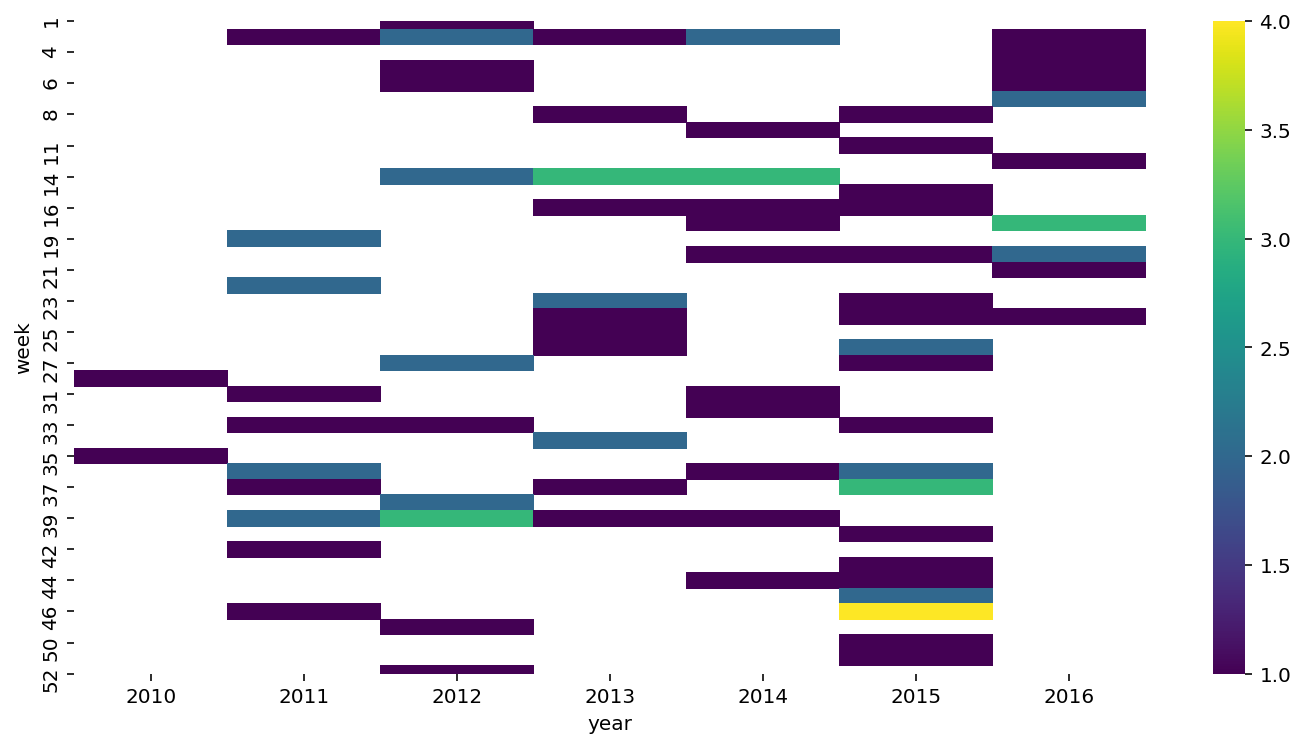

In [70]:
### Sample is small here - but what we are looking at are counts of when people term based off week & year ###
### If sample was bigger, this matrix would be filled, and we can see "hot points" on when people are terming ###
### This could be extremely useful for high volume hourly roles - we could pinpoint when positions are heavily terming ###


weekyear = df_terms.groupby(by=['week','year']).count()['event_observed'].unstack()

plt.figure(figsize =(12,6))
sns.heatmap(weekyear,cmap='viridis')

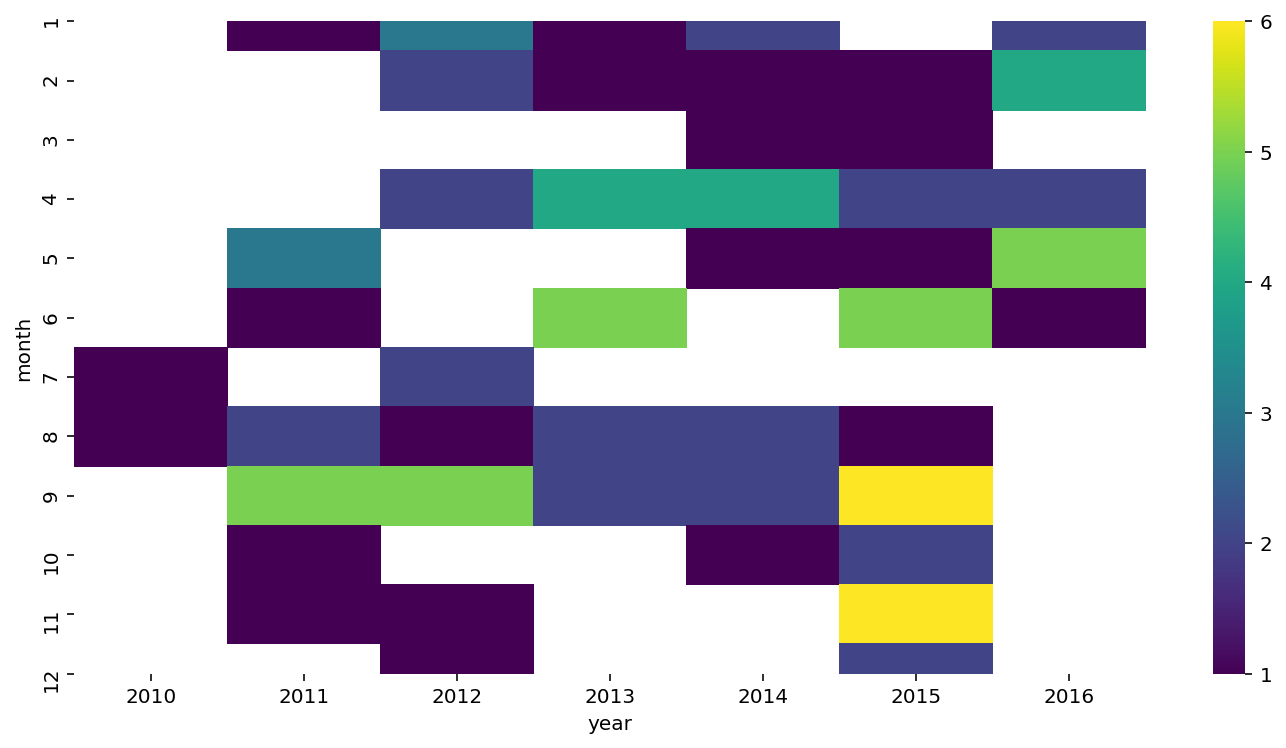

In [71]:
### Again, sample is small here - but what we are looking at counts of when people term by month & year ###
### If sample was bigger, this matrix would be filled, and we can see "hot points" on when people are terming ###


monthyear = df_terms.groupby(by=['month','year']).count()['event_observed'].unstack()

plt.figure(figsize =(12,6))
sns.heatmap(monthyear,cmap='viridis')